<a href="https://colab.research.google.com/github/ipvikas/Object_Detection_Classification_Captioning/blob/main/8_CV_OBJ_Clasn_Detn_VQA_Captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Way#1 Models

Transformers large amount of vision models (ViT): In 2020, [Google showed](https://arxiv.org/abs/2010.11929) that a Transformer encoder (BERT-like) can obtain state-of-the-art performance on ImageNet.

In 2022, it was shown that, with a few improvements, ViTs can obtain the same performance on ImageNet as a ResNet-50 given the same training time and compute.

Load a model
Instantiating a model without pre-trained weights can be done by 1) instantiating a configuration, defining the model architecture 2) creating a model based on that configuration.

In [1]:
#IMP: https://www.youtube.com/watch?v=oL-xmufhZM8
#https://github.com/NielsRogge/Transformers-Tutorials/blob/master/HuggingFace_vision_ecosystem_overview_(June_2022).ipynb
#https://huggingface.co/docs/transformers/model_doc/vit
#https://huggingface.co/docs/transformers/main_classes/pipelines

!pip install -q transformers #https://github.com/huggingface/datasets ; https://github.com/huggingface/transformers
!pip install -q timm #https://github.com/huggingface/pytorch-image-models
from transformers import ViTConfig, ViTForImageClassification
# option 1: load with randomly initialized weights (train from scratch)
config = ViTConfig(num_hidden_layers=12, hidden_size=768)
model = ViTForImageClassification(config)
print(config)

ViTConfig {
  "_attn_implementation_autoset": true,
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.46.2"
}



In [2]:
# authenticate with the hub by providing our token
!huggingface-cli login

from transformers import ViTFeatureExtractor
feature_extractor = ViTFeatureExtractor()
# or, to load one that corresponds to a checkpoint on the hub:
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224") #https://huggingface.co/google/vit-base-patch16-224


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: fineGrained).
The token `YOLO_Usage` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authentica

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Mounted at /content/drive


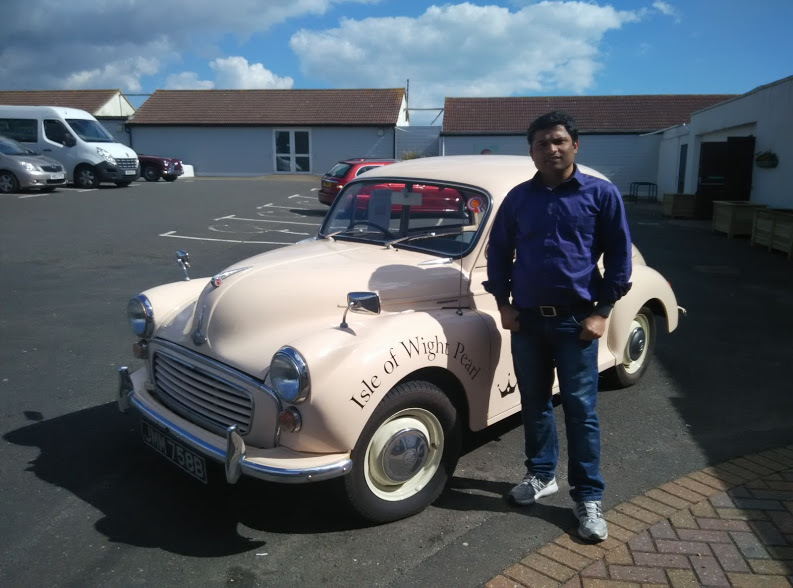

In [3]:
from PIL import Image
import requests
#url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
# image = Image.open(requests.get(url, stream=True).raw)

from google.colab import drive
drive.mount('/content/drive')
url = '/content/drive/My Drive/Colab Notebooks/POC_Projects/333.jpg'

image = Image.open(url)
image.save("Vikas.png")
image

# Way#2 Auto API

In [4]:
#1. Using "Image classification", predict which class(es) (i.e. items) belong to it. Output is 'score and 'Label", 'Box',
!pip install -q transformers

from transformers import AutoFeatureExtractor, AutoModelForImageClassification#https://huggingface.co/docs/transformers/main/en/model_doc/auto
feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-50")
model = AutoModelForImageClassification.from_pretrained("microsoft/resnet-50")#https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoModelForImageClassification
#https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoModelForObjectDetection
#https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoModelForImageSegmentation
#https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoModelForVision2Seq

preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

The Pipeline API allows you to just feed a text/image/audio to it, and get a prediction out. All complexity is handled by the pipeline.

Currently supported:

image classification (models include ViT, BEiT, DeiT, ConvNeXT, Swin Transformer, CvT, SegFormer, VAN, ResNet, RegNet, LeViT,...)
object detection (models include DETR and YOLOS)
image segmentation (models include DETR, SegFormer, DPT, BEiT)
Soon:

visual question answering (VQA)
image-to-text
depth estimation
Image classification pipeline
Image classification is probably the simplest vision task: given an image, predict which class(es) belong to it.

In [5]:
from transformers import pipeline #IMP: https://huggingface.co/docs/transformers/main_classes/pipelines
image_pipe = pipeline("image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


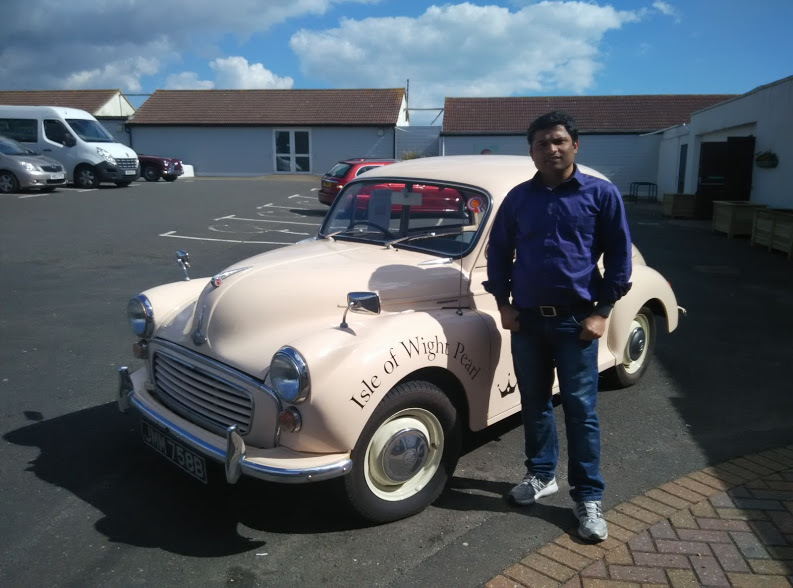

In [6]:
from PIL import Image
import requests
# url = 'https://s3.amazonaws.com/moonup/production/uploads/1662730880670-61e4006006a27a84a78caa12.jpeg'
# image = Image.open(requests.get(url, stream=True).raw)

from google.colab import drive
drive.mount('/content/drive')
url = '/content/drive/My Drive/Colab Notebooks/POC_Projects/333.jpg'

image = Image.open(url)

image.save("Vikas.png")
image

In [7]:
image_pipe(image) #Image classification is probably the simplest vision task: given an image, predict which class(es) belong to it.

[{'label': 'convertible', 'score': 0.6037451028823853},
 {'label': 'beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon',
  'score': 0.17145079374313354},
 {'label': 'pickup, pickup truck', 'score': 0.052181586623191833},
 {'label': 'car wheel', 'score': 0.039170246571302414},
 {'label': 'limousine, limo', 'score': 0.02488485537469387}]

# Way#3 Pipeline API

In [8]:
# load a ConvNeXT model
feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/convnext-tiny-224")
model = AutoModelForImageClassification.from_pretrained("facebook/convnext-tiny-224")

image_pipe = pipeline("image-classification",
                      model=model,
                      feature_extractor=feature_extractor)

print(image_pipe(image))

preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/114M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'racer, race car, racing car', 'score': 0.4454664885997772}, {'label': 'grille, radiator grille', 'score': 0.11773999780416489}, {'label': 'beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon', 'score': 0.1036883071064949}, {'label': 'cab, hack, taxi, taxicab', 'score': 0.06767823547124863}, {'label': 'pickup, pickup truck', 'score': 0.04381086304783821}]


# Way#4 Object detection pipeline

Currently, the library includes 2 Transformer-based object detection models: [DETR](https://huggingface.co/docs/transformers/model_doc/detr) and [YOLOS](https://huggingface.co/docs/transformers/model_doc/yolos).

Check out the interactive inference widget: https://huggingface.co/facebook/detr-resnet-50

In [9]:
!pip install -q timm
object_detection_pipe = pipeline("object-detection")
results = object_detection_pipe(image)
print(results)

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 1d5f47b (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'score': 0.6950539350509644, 'label': 'car', 'box': {'xmin': 0, 'ymin': 104, 'xmax': 138, 'ymax': 186}}, {'score': 0.5890135765075684, 'label': 'bench', 'box': {'xmin': 629, 'ymin': 180, 'xmax': 659, 'ymax': 201}}, {'score': 0.9942827224731445, 'label': 'car', 'box': {'xmin': 131, 'ymin': 151, 'xmax': 186, 'ymax': 184}}, {'score': 0.902854859828949, 'label': 'truck', 'box': {'xmin': 0, 'ymin': 105, 'xmax': 139, 'ymax': 189}}, {'score': 0.9944137334823608, 'label': 'car', 'box': {'xmin': 0, 'ymin': 132, 'xmax': 65, 'ymax': 190}}, {'score': 0.9963477253913879, 'label': 'car', 'box': {'xmin': 316, 'ymin': 157, 'xmax': 391, 'ymax': 204}}, {'score': 0.9521071910858154, 'label': 'car', 'box': {'xmin': 0, 'ymin': 106, 'xmax': 138, 'ymax': 187}}, {'score': 0.7087924480438232, 'label': 'truck', 'box': {'xmin': 118, 'ymin': 150, 'xmax': 683, 'ymax': 528}}, {'score': 0.9997501969337463, 'label': 'person', 'box': {'xmin': 489, 'ymin': 108, 'xmax': 632, 'ymax': 545}}]


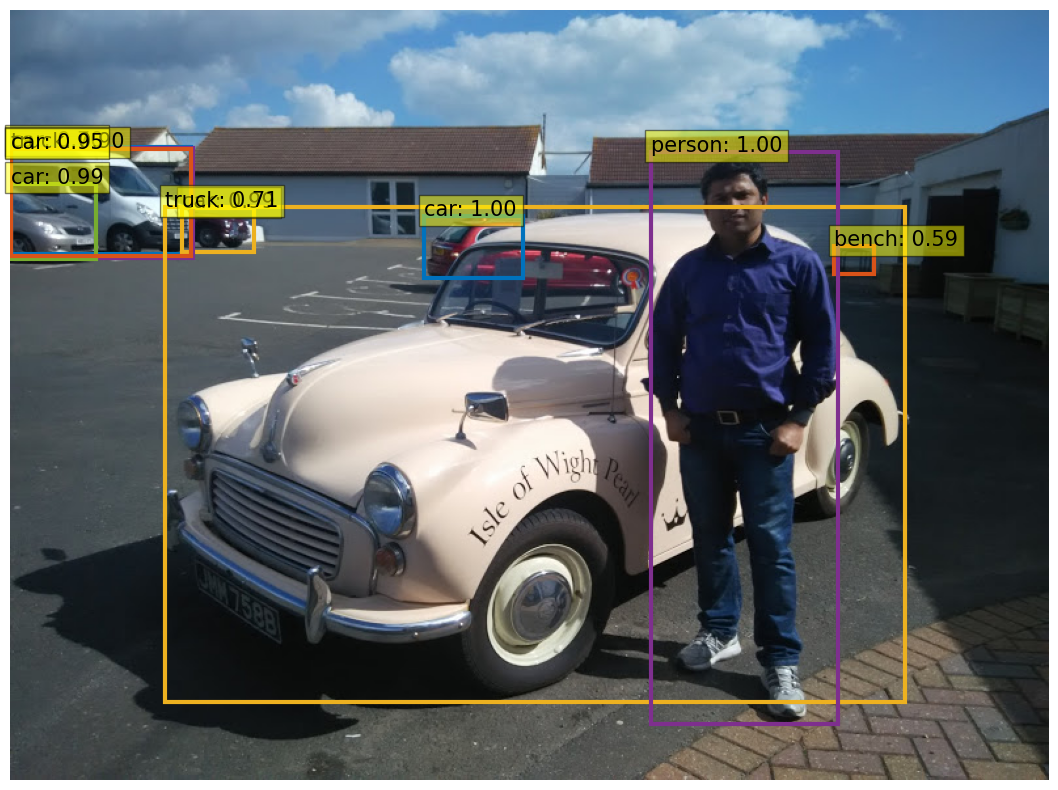

In [10]:
import matplotlib.pyplot as plt
# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125], [0.494, 0.184, 0.556], [0.466, 0.674, 0.188]]

def plot_results(image, results):
    plt.figure(figsize=(16,10))
    plt.imshow(image)
    ax = plt.gca()
    colors = COLORS * 100
    for result, color in zip(results, colors):
        box = result['box']
        xmin, xmax, ymin, ymax = box['xmin'], box['xmax'], box['ymin'], box['ymax']
        label = result['label']
        prob = result['score']
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=color, linewidth=3))
        text = f'{label}: {prob:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

plot_results(image, results)

# Image segmentation pipeline

Let's try the image segmentation pipeline. By default, a DETR model is used.

In [11]:
segmentation_pipe = pipeline("image-segmentation")
segmentation_pipe(image)

No model was supplied, defaulted to facebook/detr-resnet-50-panoptic and revision d53b52a (https://huggingface.co/facebook/detr-resnet-50-panoptic).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/172M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForSegmentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.99754,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=793x588>},
 {'score': 0.974903,
  'label': 'window-other',
  'mask': <PIL.Image.Image image mode=L size=793x588>},
 {'score': 0.999806,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=793x588>},
 {'score': 0.989077,
  'label': 'roof',
  'mask': <PIL.Image.Image image mode=L size=793x588>},
 {'score': 0.999549,
  'label': 'LABEL_187',
  'mask': <PIL.Image.Image image mode=L size=793x588>},
 {'score': 0.98184,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=793x588>},
 {'score': 0.999252,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=793x588>},
 {'score': 0.918801,
  'label': 'house',
  'mask': <PIL.Image.Image image mode=L size=793x588>},
 {'score': 0.940738,
  'label': 'truck',
  'mask': <PIL.Image.Image image mode=L size=793x588>},
 {'score': 0.938791,
  'label': 'LABEL_191',
  'mask': <PIL.Image.Image image mode=L size=793x588>}]

# Way#5 Visual question answering (VQA)

In [12]:
#2. Using 'Visual question answering (VQA)", ask a question, relevant to the image and get the answer
!pip install -q  datasets
from datasets import load_dataset #https://huggingface.co/datasets/imagenet-1k
# dataset = load_dataset("cifar100")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [14]:
from transformers import ViltProcessor, ViltForQuestionAnswering
processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

preprocessor_config.json:   0%|          | 0.00/251 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/136k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/470M [00:00<?, ?B/s]

In [15]:
question = "how many person are there?"
encoding = processor(image, question, return_tensors="pt")
print(encoding.keys())

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'pixel_values', 'pixel_mask'])


In [16]:
# forward pass
outputs = model(**encoding)
logits = outputs.logits

In [17]:
predicted_class_idx = logits.argmax(-1).item()
print("Predicted answer:", model.config.id2label[predicted_class_idx])

Predicted answer: 1


# Way#6 CLIP Model

[CLIP](https://huggingface.co/docs/transformers/main/en/model_doc/clip) is a model by OpenAI that was trained on 400 million (image, text) pairs in a constrastive way. The model consists of 2 encoders (an image and a text encoder), that can be used to match image with text.

The model is also capable of zero-shot image classification.

In [18]:
#3. Using 'CLIP', get higher score to a class label, which is more relevant
from transformers import CLIPProcessor, CLIPModel
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
inputs = processor(text=["two persons are standing", "one person is standing"], images=image, return_tensors="pt", padding=True)

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [19]:
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
print(probs)

tensor([[0.6272, 0.3728]], grad_fn=<SoftmaxBackward0>)


In [20]:
zero_shot = pipeline("zero-shot-image-classification")
zero_shot(images=image, candidate_labels=["two persons are standing", "one person is standing"])

No model was supplied, defaulted to openai/clip-vit-base-patch32 and revision 3d74acf (https://huggingface.co/openai/clip-vit-base-patch32).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'score': 0.6164777874946594, 'label': 'two persons are standing'},
 {'score': 0.38352224230766296, 'label': 'one person is standing'}]

# Way#7 VisionEncoderDecoderModel (image captioning)

In [21]:
from transformers import VisionEncoderDecoderModel
# initialize a vit-bert from a pretrained ViT and a pretrained BERT model. Note that the cross-attention layers will be randomly initialized
model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(
    "google/vit-base-patch16-224-in21k", "bert-base-uncased"
)
# saving model after fine-tuning
model.save_pretrained("./vit-bert")
# load fine-tuned model
model = VisionEncoderDecoderModel.from_pretrained("./vit-bert")

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertLMHeadModel were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['bert.encoder.layer.0.crossattention.output.LayerNorm.bias', 'bert.encoder.layer.0.crossattention.output.LayerNorm.weight', 'bert.encoder.layer.0.crossattention.output.dense.bias', 'bert.encoder.layer.0.crossattention.output.dense.weight', 'bert.encoder.layer.0.crossattention.self.key.bias', 'bert.encoder.layer.0.crossattention.self.key.weight', 'bert.encoder.layer.0.crossattention.self.query.bias', 'bert.encoder.layer.0.crossattention.self.query.weight', 'bert.encoder.layer.0.crossattention.self.value.bias', 'bert.encoder.layer.0.crossattention.self.value.weight', 'bert.encoder.layer.1.crossattention.output.LayerNorm.bias', 'bert.encoder.layer.1.crossattention.output.LayerNorm.weight', 'bert.encoder.layer.1.crossattention.output.dense.bias', 'bert.encoder.layer.1.crossattention.output.dense.weight', 'bert.encoder.layer.1.crossattention.self.key.bias', 'bert.e

In [22]:
from transformers import AutoTokenizer
repo_name = "ydshieh/vit-gpt2-coco-en"

feature_extractor = ViTFeatureExtractor.from_pretrained(repo_name)
tokenizer = AutoTokenizer.from_pretrained(repo_name)
model = VisionEncoderDecoderModel.from_pretrained(repo_name)

preprocessor_config.json:   0%|          | 0.00/211 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/236 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.34k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.46.2"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

In [23]:
pixel_values = feature_extractor(image, return_tensors="pt").pixel_values
# autoregressively generate text (using beam search or other decoding strategy)
generated_ids = model.generate(pixel_values, max_length=16, num_beams=4, return_dict_in_generate=True)

# decode into text
preds = tokenizer.batch_decode(generated_ids[0], skip_special_tokens=True)
preds = [pred.strip() for pred in preds]
print(preds)

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


['a man standing in front of a parked car']


# Way#8: YOLO Object Detection_cvlib

In [24]:
#https://www.cvlib.net/
#https://www.youtube.com/watch?v=Az7aYcZ-oJE
!pip install -q cvlib

import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
from IPython.display import Image, display

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 48.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


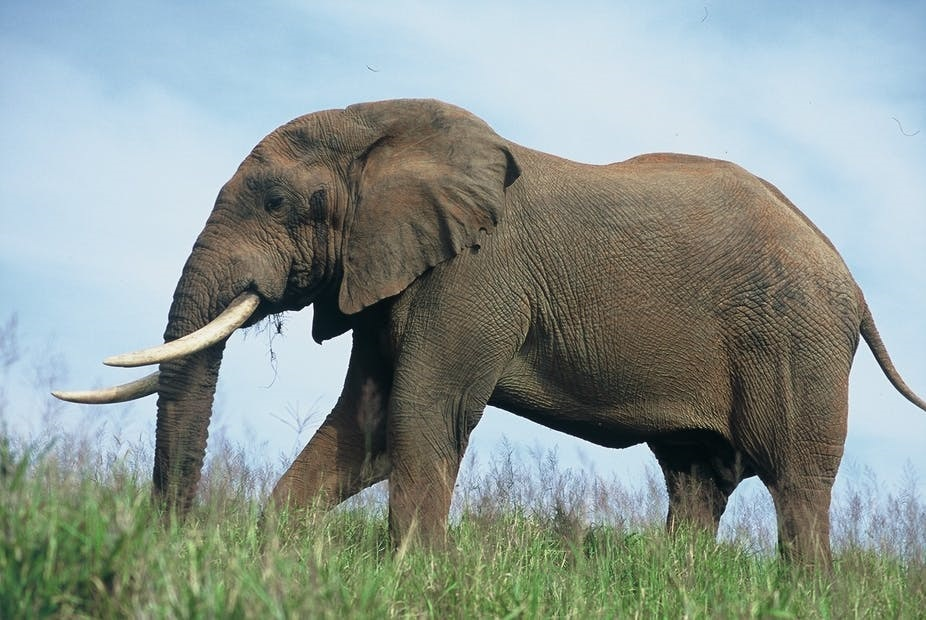

In [25]:
from google.colab import drive
drive.mount('/content/drive')
FILE_NAME = '/content/drive/My Drive/Colab Notebooks/DeepLearning/Elephant.jpg'
open(FILE_NAME,mode ='r')

# FILE_NAME = "Elephant.jpg"
OUT_FILE_NAME = "image-out.jpeg"
display(Image(FILE_NAME, width = 700, height = 300))

In [27]:
!pip install -q --upgrade progressbar2 # Upgrade to the progressbar2 package
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
from IPython.display import Image, display

#Object Detection
img = cv2.imread(FILE_NAME)
try:
    bbox, label, conf = cv.detect_common_objects(img, confidence=0.6, model="yolov3-tiny")
except ValueError:
    print("Error during download. Retrying...")
    # Re-attempt the download by removing the existing files (if any) and trying again
    import os
    import shutil
    cvlib_dir = os.path.expanduser("~/.cvlib/object_detection/")
    for filename in ["yolov3-tiny.cfg", "yolov3-tiny.weights"]:
        filepath = os.path.join(cvlib_dir, filename)
        if os.path.exists(filepath):
            if os.path.isfile(filepath):
                os.remove(filepath)
            else:
                shutil.rmtree(filepath)  # Remove directory if it exists
    bbox, label, conf = cv.detect_common_objects(img, confidence=0.6, model="yolov3-tiny")

for l, c in zip(label, conf):
    print(f"Detected object: {l} with confidence level of {c}n")

Error during download. Retrying...


Detected object: elephant with confidence level of 0.7756929993629456n
